- 데이터 설명: facebook광고 집행결과 데이터
- 데이터분석의 목표 : 전환율(conversion)분석

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("./KAG_conversion_data.csv")
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2


In [4]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


data dictionary
- ad_id: 광고 id
- xyz_campaign_id : xyz회사에서 부여한 campaign id
- fb_campaign_id : 페이스북에서 부여한 campaign id
- age: 각 AD에 노출된 사용자 나이
- gender : 광고에 노출된 성별
- interest: 페북 공개 프로필에 기반한 사용자 관심 코드
- impressions: 광고 노출 횟수
- clicks: 광고 클릭 횟수
- spent: xyz회사에서 페이스북에 지출한 광고 집행 비용
- total_conversion: 광고를 보고 문의 건수
- approved_conversion: 광고를 본후 물건을 구매한 건수

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [6]:
df.shape

(1143, 11)

In [7]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


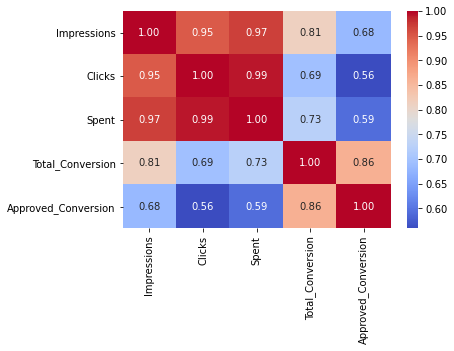

In [16]:
cor_mat=sns.heatmap(df[[ "Impressions", "Clicks", "Spent", "Total_Conversion", "Approved_Conversion"]].corr(),
                    annot=True,
                    fmt = ".2f",
                    cmap="coolwarm")

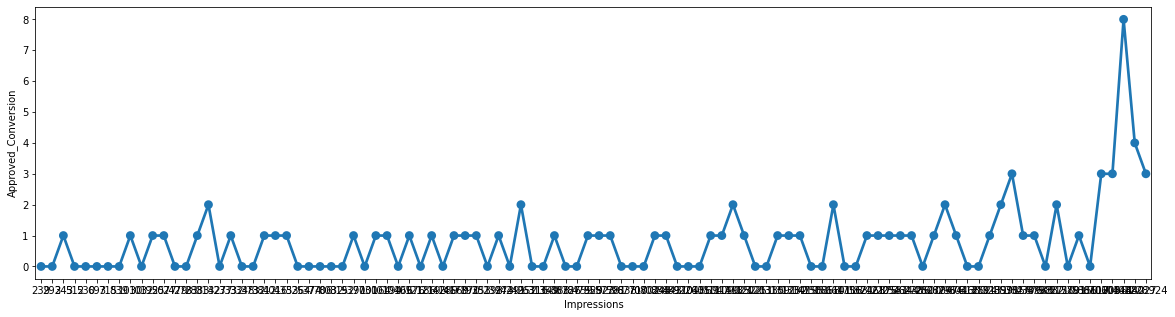

In [21]:
plt.figure(figsize=(20, 5))
sns.pointplot(x="Impressions", y="Approved_Conversion", data=df.sample(100))
plt.show()

<AxesSubplot:xlabel='Impressions', ylabel='Approved_Conversion'>

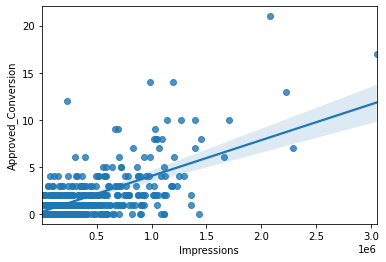

In [22]:
sns.regplot(x="Impressions", y="Approved_Conversion", data=df)

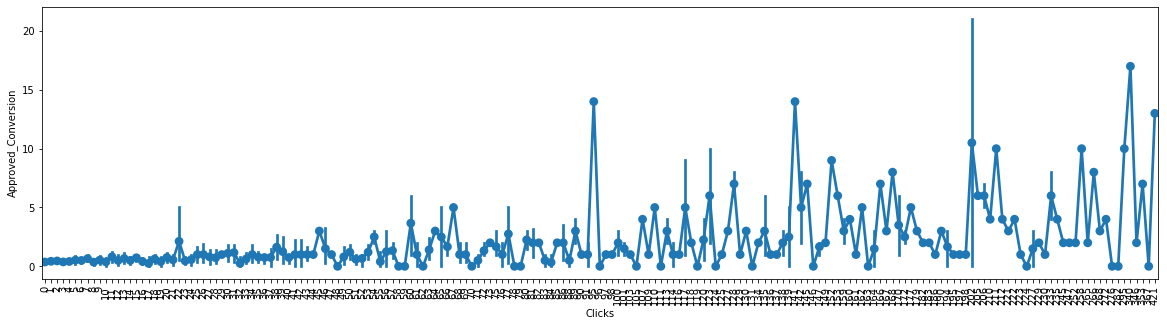

In [25]:
plt.figure(figsize=(20, 5))
sns.pointplot(x="Clicks", y="Approved_Conversion",data=df)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Clicks', ylabel='Approved_Conversion'>

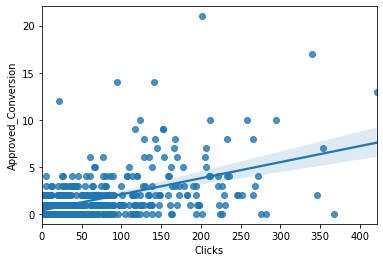

In [26]:
sns.regplot(x="Clicks", y="Approved_Conversion",data=df)

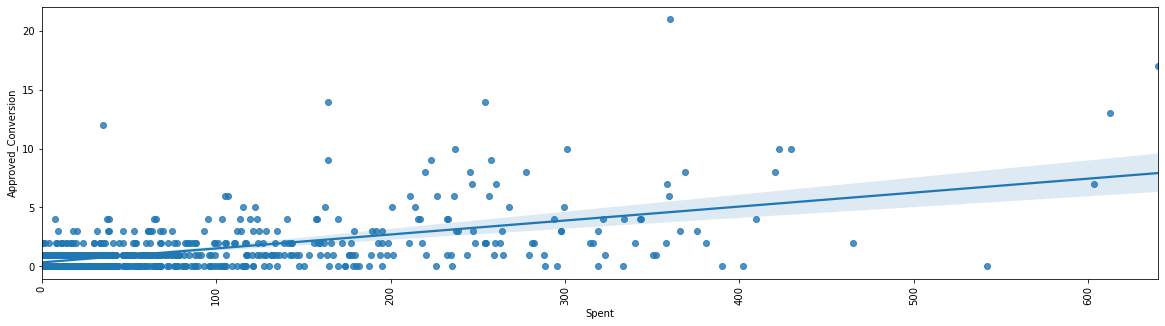

In [29]:
plt.figure(figsize=(20, 5))
sns.regplot(x="Spent", y="Approved_Conversion", data=df)
plt.xticks(rotation=90)
plt.show()

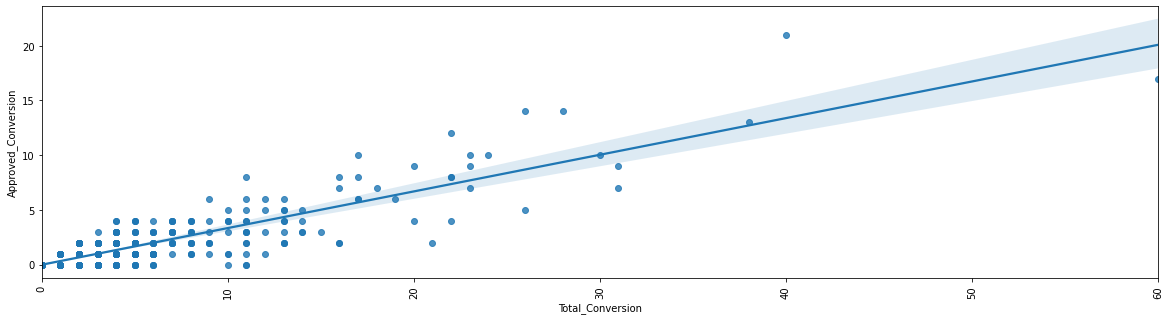

In [31]:
plt.figure(figsize=(20, 5))
sns.regplot(x="Total_Conversion", y="Approved_Conversion", data=df)
plt.xticks(rotation=90)
plt.show()